# Keeling curve

As a first example we look at the Keeling curve (https://en.wikipedia.org/wiki/Keeling_Curve).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dr=[190.0/255.0,30.0/255.0,45.0/255.0]
dy=[255.0/255.0,213.0/255.0,58.0/255.0]
dg=[175.0/255.0,169.0/255.0,97.0/255.0] # Durham green
db=[0,174.0/255.0,239.0/255.0]
dp=[104.0/255.0,36.0/255.0,109.0/255.0]
di=[0.0/255.0,42.0/255.0,65.0/255.0] # Durham ink	
dpi=[203.0/255.0,168.0/255.0,177.0/255.0] #  Durham pink 
ds=[218.0/255.0,205.0/255.0,162.0/255.0] # Durham stone

plt.matplotlib.__version__

'3.5.3'

Import the data and have a look.

In [2]:
co2_file = "ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_weekly_mlo.txt"
df_co2 = pd.read_csv(co2_file, sep='\s+', comment='#', header=None)

print(df_co2.head(6))

      0  1   2          3       4  5       6       7      8
0  1974  5  19  1974.3795  333.37  5 -999.99 -999.99  50.39
1  1974  5  26  1974.3986  332.95  6 -999.99 -999.99  50.05
2  1974  6   2  1974.4178  332.35  5 -999.99 -999.99  49.60
3  1974  6   9  1974.4370  332.20  7 -999.99 -999.99  49.65
4  1974  6  16  1974.4562  332.37  7 -999.99 -999.99  50.06
5  1974  6  23  1974.4753  331.73  5 -999.99 -999.99  49.72


There are 9 columns. We are going to be work with 3 and 4 which correspond 
to time in years and CO2 in ppm. Make a plot.

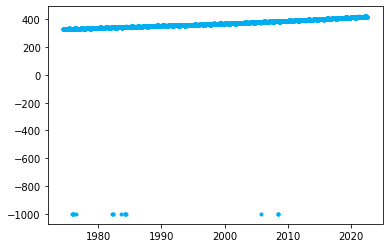

In [3]:
df_co2 = pd.read_csv(co2_file, sep='\s+', comment='#', header=None,
            usecols=[3,4],
            names=['time','CO2_ppm'])

fig, ax = plt.subplots(1,facecolor='white')
x = pd.Series(df_co2['time']).values
y = pd.Series(df_co2['CO2_ppm']).values
ax.plot(x,y,'.',color = db)

Some missing data are set at negative values. Let's filter those out.

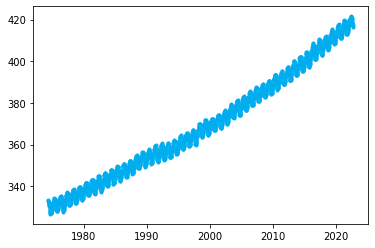

In [4]:
filtered_df_co2 = df_co2[(df_co2['CO2_ppm']>= (0))]

fig, ax = plt.subplots(1,facecolor='white')
x = pd.Series(filtered_df_co2['time']).values
y = pd.Series(filtered_df_co2['CO2_ppm']).values
ax.plot(x,y,'.',color = db)

We can use pandas to select data according to some criteria. 
For example for each decade.

Text(0.5, 0, 'Decade Year')

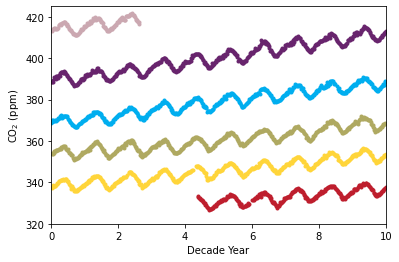

In [5]:
DU_color = [dr, dy, dg, db, dp, dpi]

fig, ax = plt.subplots(1,facecolor='white')

col = 0
for start_yr in range (1970,2030,10):
    filtered_df_co2 = df_co2[(df_co2['time'] >= (start_yr)) 
                             & (df_co2['time']<= (start_yr+10))
                             & (df_co2['CO2_ppm']>= (0))]
    x = pd.Series(filtered_df_co2['time']).values
    y = pd.Series(filtered_df_co2['CO2_ppm']).values
    ax.plot(x-start_yr,y,'.',color = DU_color[col])
    col +=1

ax.set_xlim(0,10)
ax.set_ylim(320,425)
ax.set_ylabel('CO$_2$ (ppm)')
ax.set_xlabel('Decade Year')


Next, we fit the data. We could fit all the data, or we could select data between particular dates.
Below we fit each year (or multiple years by setting fit range to an integer greater than 1).
In the right hand plots, we look at how each parameter in the fit varies year on year.
For example, we can look at whether the amplitude or phase of seasonal variation changes.

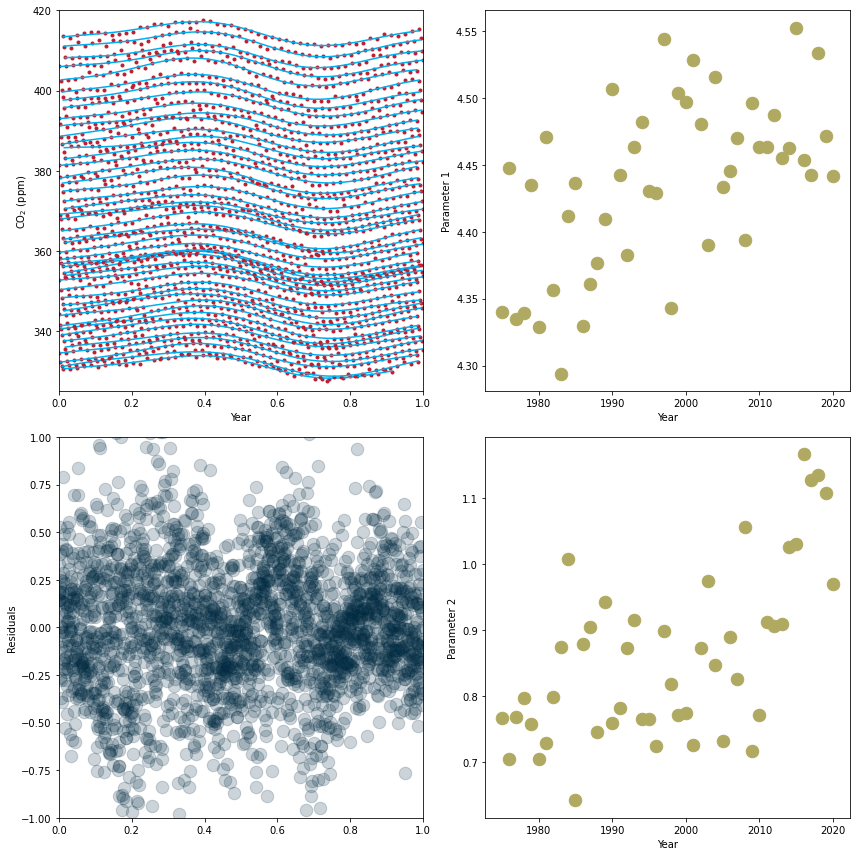

In [6]:
from scipy.optimize import leastsq, curve_fit

def fit1(x,A,B,C,D,E,F):
    return A+B*x+C*np.cos(2*np.pi*x+D)+E*np.cos(2*2*np.pi*x+F)

fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, figsize=(12, 12))

parameter1 = []
parameter2 = []

fit_range = 1

year1 = 1975
yearN = 2021

col = 0

for start_yr in range (year1,yearN,fit_range):
    filtered_df_co2 = df_co2[(df_co2['time'] >= (start_yr)) 
                             & (df_co2['time']<= (start_yr+fit_range))
                             & (df_co2['CO2_ppm']>= (0))]
    x = pd.Series(filtered_df_co2['time']).values
    y = pd.Series(filtered_df_co2['CO2_ppm']).values
    A, B, C, D, E, F = curve_fit(fit1,x-start_yr,y,
                            bounds=(0, [500, 4, 10, 2*np.pi, 10, 1*np.pi]))[0]
    parameter1.append(D)
    parameter2.append(E)
    ax1.plot(x-start_yr,y,'.',color = dr)
    yfit = fit1(x-start_yr, A,B,C,D,E,F)
    ax1.plot(x-start_yr, yfit, color = db)
    ax3.plot(x - start_yr, y - yfit,'.', color = di, markersize = 25, linewidth = 0, alpha = 0.2)
    col +=1
    
ax1.set_xlim(0,fit_range)
ax1.set_ylim(325,420)
ax1.set_ylabel('CO$_2$ (ppm)')
ax1.set_xlabel('Year')

ax2.plot(np.arange(year1,yearN,fit_range),parameter1,'.',color = dg, markersize = 25)    
ax2.set_xlabel('Year')
ax2.set_ylabel('Parameter 1')

ax3.set_xlim(0.0,1.0)
ax3.set_ylim(-1.0,1.0)
ax3.set_ylabel('Residuals')

ax4.plot(np.arange(year1,yearN,fit_range),parameter2,'.',color = dg, markersize = 25)    
ax4.set_xlabel('Year')
ax4.set_ylabel('Parameter 2')


fig.tight_layout()

#fig.savefig('T_emission.png',bbox_inches='tight')

Now, we shall look at the long term trend. 
Any departure from trend should show
up in residuals between the data and the fit.
The secular trend is fit to a quadratic but we need
at least 2 decades of data to capture the curvature.
Even then we need to be careful.
Below a fit is made on data between 2000 and 2020.
If instead we fit between 1990 and 2010 the curve is very different!
But three decades from 1990 to 2020 gives similar results to
2000 to 2020 which gives some confidence.

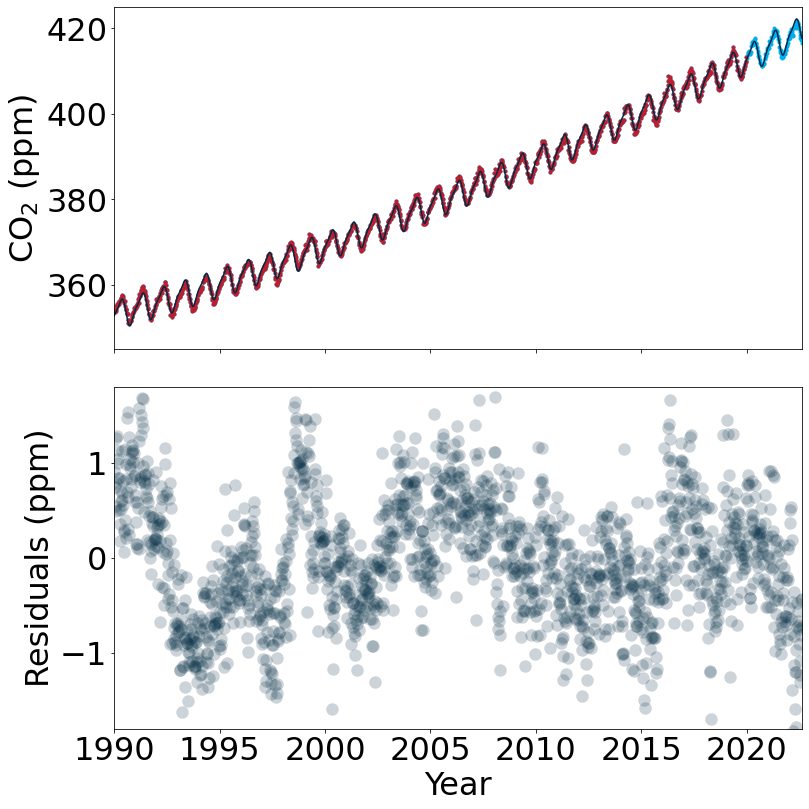

In [7]:
filtered_df_co2 = df_co2[(df_co2['CO2_ppm']>= (0))]
x_all = pd.Series(filtered_df_co2['time']).values
y_all = pd.Series(filtered_df_co2['CO2_ppm']).values
num = np.size(x_all)
xmin = x_all[0]
xmax = x_all[num-1]

plt.rcParams.update({'font.size': 32})
plt.rcParams.update({'figure.figsize':(12,12)})
fig, [ax1, ax3] = plt.subplots(2,1)
ax1.plot(x_all,y_all,'.',color = db)

start_yr = 1990
no_decades = 3
filtered_df_co2 = df_co2[(df_co2['time'] >= (start_yr)) 
                             & (df_co2['time']<= (start_yr+10*no_decades))
                             & (df_co2['CO2_ppm']>= (0))]

x = pd.Series(filtered_df_co2['time']).values
y = pd.Series(filtered_df_co2['CO2_ppm']).values

ax1.plot(x,y,'.',color = dr)

def fit3(x, A,B,C,D,E,F,G):
    return A + B*x + C*x*x + D*np.cos(2*np.pi*x + E) + F*np.cos(2*2*np.pi*x+G)

A,B,C,D,E,F,G = curve_fit(fit3, x, y)[0]

x_fit = np.arange(xmin,xmax,(xmax-xmin)/num)
y_fit = fit3(x_fit, A, B, C, D, E, F, G)
ax1.plot(x_fit,y_fit,color = di)

xmin2 = 1990

ax1.set_xlim(xmin2,xmax)
ax1.set_ylim(345,425)
ax1.set_xticklabels([])
ax1.set_ylabel('CO$_2$ (ppm)')

ax3.plot(x_all,y_all - fit3(x_all, A, B, C, D, E, F, G),'.',markersize = 25, 
         markeredgecolor = 'None',
            linestyle = 'None',
         color = di,  alpha = 0.2)
ax3.set_xlim(xmin2,xmax)
ax3.set_ylim(-1.8,1.8)
ax3.set_ylabel('Residuals (ppm)')
ax3.set_xlabel('Year')
fig.tight_layout()
fig.savefig('BAU_2000_2020.png')

Or we can fit the complete data set from 1974 to current.

(1974.3795, 2022.637)

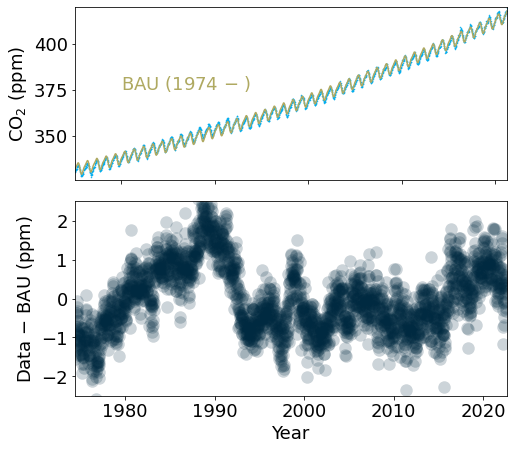

In [8]:
from scipy.optimize import leastsq, curve_fit

def fit74(x,A,B,C,D,E,F,G):
    return A+B*x+C*x*x+D*np.cos(2*np.pi*x+E)+F*np.cos(2*2*np.pi*x+G)

A,B,C,D,E,F,G=curve_fit(fit3,x_all,y_all)[0]
y_fit=fit74(x_fit,A,B,C,D,E,F,G)

plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'figure.figsize':(6,6)})

fig = plt.figure(1,facecolor='white')
ax1 = fig.add_axes([0.05, 0.6, 1.0, 0.4])
ax1.plot(x_all,y_all,'.',markersize=1,color=db)
ax1.plot(x_fit,y_fit,color=dg)
ax1.set_xlim(1975,2021.25)
ax1.set_ylim(326,420)
ax1.set_ylabel('CO$_2$ (ppm)')
ax1.set_xticklabels([])
ax1.text(1980,375,'BAU (1974 $-$ )',color=dg)

ax3 = fig.add_axes([0.05, 0.1, 1.0, 0.45])
n_tot=np.size(y)
ax3.plot(x_all,y_all - fit74(x_all, A, B, C, D, E, F, G),'.',markersize = 25, 
         markeredgecolor = 'None',
            linestyle = 'None',
         color = di,  alpha = 0.2)
ax3.set_ylabel('Data $-$ BAU (ppm)')
ax3.set_xlabel('Year')
ax3.set_ylim(-2.5,2.5)
ax3.set_xlim(xmin,xmax)
#fig.savefig('BAU_2020.png',bbox_inches='tight')

Now, go back to decadal plot and add a fit.
This time rather than using pandas we use numpy to
extract beginning and end indices for each decade.

Text(0, 0.5, 'CO$_2$ (ppm)')

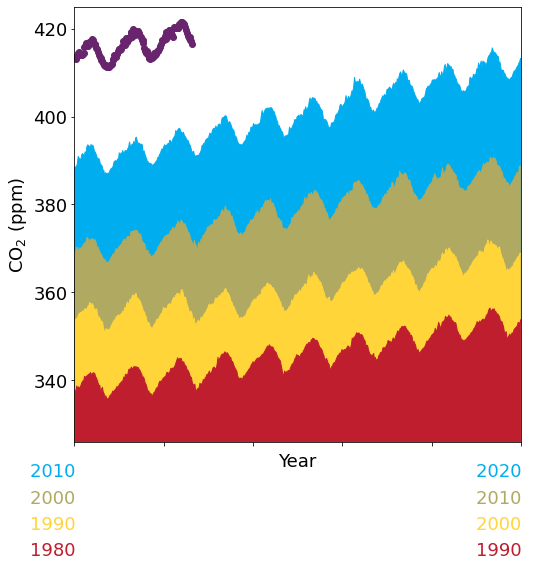

In [9]:
num = np.size(x_all)
DU_color = [dr, dy, dg, db, dp, dpi]

fig, ax = plt.subplots(1,facecolor='white',figsize=(8, 8))
col = 0
decade_list = []
decade_begins = []
decade_ends = []
for decade in range (1980,2020,10):
    decade_list.append(decade)
    idx = (x_all > decade)
    i_begin = np.where(idx)[0][0]
    decade_begins.append(i_begin)
    idx = (x_all > decade + 10)
    i_end = np.where(idx)[0][0]
    decade_ends.append(i_end)
#    ax.scatter(x_all[i_begin:i_end]-decade,y_all[i_begin:i_end], color = DU_color[col])
    col +=1

ax.scatter(x_all[i_end:num]-2020,y_all[i_end:num], color = DU_color[col])

for jj in range(3,-1,-1):
    ax.fill_between(x_all[decade_begins[jj]:decade_ends[jj]]-decade_list[jj],
                y_all[decade_begins[jj]:decade_ends[jj]],color = DU_color[jj]) 
    ax.text(-1.0,300+6*jj,"%.0f " % (decade_list[jj]),color = DU_color[jj])
    ax.text(10.0-1.0,300+6*jj,"%.0f " % (decade_list[jj]+10),color = DU_color[jj])
    
ax.set_xlim(0,10)
ax.set_ylim(326,425)
ax.set_xticklabels([])
ax.set_xlabel('Year')
ax.set_ylabel('CO$_2$ (ppm)')

#fig.savefig('keeling_decadal.png',bbox_inches='tight')

Finally, we repeat this plot with the seasonal variation removed and compare to the fit. 
Here we use a 3 decade fit which above was set as 1990-2020.
We project the fit out to 2030. Will future data come in below this prediction?
As a reminder of politics, we add markers for Earth Summit and key COPs.

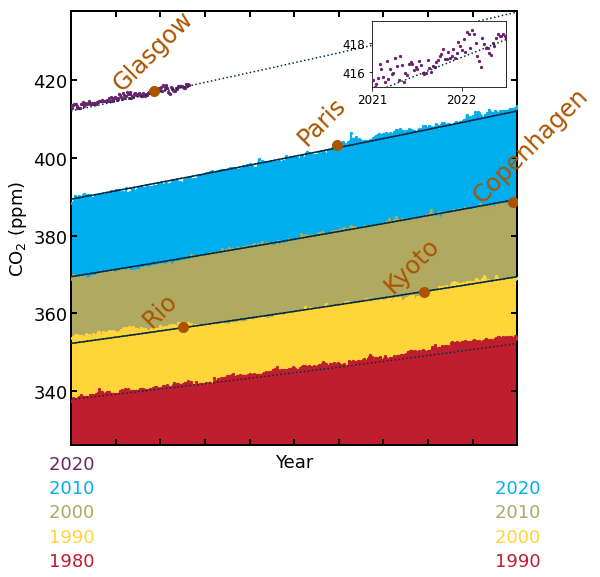

In [10]:
y_s = y_all-(D*np.cos(2*np.pi*x_all+E)+F*np.cos(2*2*np.pi*x_all+G))

fig, ax = plt.subplots(1,facecolor='white',figsize=(8, 8))
col = 4

label_offset = 295
for jj in range(3,-1,-1):
    ax.fill_between(x_all[decade_begins[jj]:decade_ends[jj]]-decade_list[jj],
                y_s[decade_begins[jj]:decade_ends[jj]],color = DU_color[jj]) 
    ax.scatter(x_all[decade_begins[jj]:decade_ends[jj]]-decade_list[jj],
                y_s[decade_begins[jj]:decade_ends[jj]], color = DU_color[jj],s=5,zorder=3)
    ax.text(-0.5,label_offset+6.2*jj,"%.0f " % (decade_list[jj]),color = DU_color[jj])
    ax.text(10.0-0.5,label_offset+6.2*jj,"%.0f " % (decade_list[jj]+10),color = DU_color[jj])    

jj = 4
ax.scatter(x_all[i_end:num]-2020,y_s[i_end:num], color = DU_color[jj],s=5,zorder=3)
ax.text(-0.5,label_offset+6.2*jj,"2020 " ,color = DU_color[4])
  
for decade in range (1980,2030,10):
    x_fit = np.arange(decade,decade+10,0.01)
    y_fit_s = fit3(x_fit,A,B,C,D,E,F,G)-(D*np.cos(2*np.pi*x_fit+E)+F*np.cos(2*2*np.pi*x_fit+G))
    ax.plot(x_fit-decade,y_fit_s,':',color =di,zorder=4)

for decade in range (1990,2020,10):
    x_fit = np.arange(decade,decade+10,0.01)
    y_fit_s = fit3(x_fit,A,B,C,D,E,F,G)-(D*np.cos(2*np.pi*x_fit+E)+F*np.cos(2*2*np.pi*x_fit+G))
    ax.plot(x_fit-decade,y_fit_s,color =di,zorder=4)
        
COPS = ['Rio', 'Kyoto', 'Copenhagen', 'Paris', 'Glasgow']
COP_DECADE = [1990, 1990, 2000, 2010, 2020]
COP_DATES = [1992.5, 1997.9, 2009.9, 2015.95, 2021.85]

N_COPS = np.size(COP_DATES)

for ll in range(0, N_COPS):
    idx = (x_all > COP_DATES[ll]) & (x_all < COP_DATES[ll] + 0.02)
    ii = np.where(idx)[0][0]
    ax.scatter(x_all[ii] - COP_DECADE[ll],y_s[ii],s = 100, c = [[0.67,0.33,0.0]],zorder=5)
    ax.text(x_all[ii] - COP_DECADE[ll] - 1 ,y_s[ii] + 0,COPS[ll],
            fontsize = 24,rotation = 45, color = [0.67,0.33,0.0])

ax.set_xlim(0,10)
ax.set_ylim(326,438)
ax.set_xticks(np.arange(0,10,1))
ax.set_xticklabels([])
ax.set_xlabel('Year')
ax.set_ylabel('CO$_2$ (ppm)')

lw=6
ax_lw=2
tick_lw=3
tick_len=6

for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(ax_lw)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(width=ax_lw,length=tick_len,direction='in')
ax.yaxis.set_tick_params(width=ax_lw,length=tick_len,direction='in')

axin1 = ax.inset_axes([0.675, 0.825, 0.3, 0.15])
axin1.scatter(x_all[i_end:num]-2020,y_s[i_end:num], color = DU_color[jj],s=5,zorder=3)
decade = 2020
x_fit = np.arange(decade,decade+10,0.01)
y_fit_s = fit3(x_fit,A,B,C,D,E,F,G)-(D*np.cos(2*np.pi*x_fit+E)+F*np.cos(2*2*np.pi*x_fit+G))
axin1.plot(x_fit-decade,y_fit_s,':',color =di,zorder=4)
axin1.set_xlim(1,2.5)
axin1.set_xticks([1,2])
axin1.set_xticklabels(['2021','2022'],fontsize=12)
axin1.set_yticks([416,418])
axin1.set_yticklabels(['416','418'],fontsize=12)
axin1.set_ylim(415,419.5)



fig.savefig('keeling_decadal.png',bbox_inches='tight')